In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
#Load dataset
df = pd.read_csv('../../data/hotel_bookings.csv', na_values = 'NULL')
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [26]:
df.shape

(119390, 32)

In [27]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Handling missing values

There are few columns that have missing values : `children`, `country`, `agent` and `company`.

In [28]:
n = (df.isnull().sum())
n


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [29]:
count_na = df.isnull().sum().sort_values(ascending = False)
percent_na = count_na * 100 / len(df)

# Create a DataFrame with results
missing_values_table = pd.DataFrame({'count_na': count_na, 'percent_na' : percent_na})
missing_values_table.round(3)

count_na  percent_na
company                           112593      94.307
agent                              16340      13.686
country                              488       0.409
children                               4       0.003
arrival_date_month                     0       0.000
arrival_date_week_number               0       0.000
hotel                                  0       0.000
is_canceled                            0       0.000
stays_in_weekend_nights                0       0.000
arrival_date_day_of_month              0       0.000
adults                                 0       0.000
stays_in_week_nights                   0       0.000
babies                                 0       0.000
meal                                   0       0.000
lead_time                              0       0.000
arrival_date_year                      0       0.000
distribution_channel                   0       0.000
market_segment                         0       0.000
previous_bookings_not_canceled         0       0.000
is_repeated_guest                      0       0.000
reserved_room_type                     0       0.000
assigned_room_type                     0       0.000
booking_changes                        0       0.000
previous_cancellations                 0       0.000
deposit_type                           0       0.000
days_in_waiting_list                   0       0.000
customer_type                          0       0.000
adr                                    0       0.000
required_car_parking_spaces            0       0.000
total_of_special_requests              0       0.000
reservation_status                     0       0.000
reservation_status_date                0       0.000

The `company` and `agent` columns have many missing values, with 94.31% and 13.69% of the data missing, respectively.  At first, it might seem we should remove these variables, but the [data source](https://www.sciencedirect.com/science/article/pii/S2352340918315191) tells us:<br>
>_in some categorical variables like Agent or Company, “NULL” is presented as one of the categories. This should not be considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent._

For this reason, I transformed these variables into binary variables, replacing NULL values with 0 and all other values with 1. I renamed them `used_company` and `used_agent`.


The column `country` has 0.41% missing values (488 rows) and I decided to remove these rows, as well as the 4 rows from the `children` column.

In [30]:
df['used_company'] = df['company'].apply(lambda x: 0 if pd.isna(x) else 1)
df['used_agent'] = df['agent'].apply(lambda x: 0 if pd.isna(x) else 1)
df1 = df.drop(columns=['company', 'agent'])
df2 = df1.dropna()

In [31]:
df2.shape

(118898, 32)

In [32]:
df2.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# Handling inconsistent data

In [33]:
df2.describe(include='object')

hotel arrival_date_month    meal country market_segment  \
count       118898             118898  118898  118898         118898   
unique           2                 12       5     177              7   
top     City Hotel             August      BB     PRT      Online TA   
freq         79302              13852   91863   48586          56402   

       distribution_channel reserved_room_type assigned_room_type  \
count                118898             118898             118898   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97730              85601              73863   

       deposit_type customer_type reservation_status reservation_status_date  
count        118898        118898             118898                  118898  
unique            3             4                  3                     926  
top      No Deposit     Transient          Check-Out              2015-10-21  
freq         104163         89174              74745                    1461

In [34]:
# Unique values of categorical columns, excluding 'reservation_status_date'
for col in df2.describe(include='object').columns:
    if col != 'reservation_status_date':
        print(f"{col}\n {df2[col].unique()}\n" + '-' * 50)

hotel
 ['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
 ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
 ['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
 ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In the `meal` column, the 'Undefined' category will be replaced with 'SC' (Self Catering) to reflect the absence of a meal package.

In [35]:
df2.loc[:,'meal'] = df2['meal'].replace('Undefined', 'SC')
df2['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

The variables `adults`, `children` and `babies` cannot all be zero in the same row.

In [36]:
# Rows with no guest
no_guest = (df2['babies'] == 0) & (df2['children'] == 0) & (df2['adults'] == 0)
len(df2[no_guest])

170

In [37]:
# Droppring rows with no guest
df3 = df2[~no_guest]

In [38]:
# Verification
no_guest_v = (df3['babies'] == 0) & (df3['children'] == 0) & (df3['adults'] == 0)
df3[no_guest_v].shape[0]

0

# Convert data types

Due to the presence of missing values in the `children` column, its type is float. I will convert it to integer. In addition, the `reservation_status_date` column is of type object, whereas it should be in date format.

In [39]:
df3.loc[:,'children'] = df3['children'].astype(int)
df3.loc[:,'reservation_status_date'] = pd.to_datetime(df3['reservation_status_date'])

In [40]:
df3[['children', 'reservation_status_date']].dtypes

children                   float64
reservation_status_date     object
dtype: object

# Handling outliers

In [41]:
df3.describe(include='number')

is_canceled      lead_time  arrival_date_year  \
count  118728.000000  118728.000000      118728.000000   
mean        0.371757     104.401312        2016.157596   
std         0.483276     106.915284           0.707456   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      70.000000        2016.000000   
75%         1.000000     161.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             118728.000000              118728.000000   
mean                  27.165100                  15.800965   
std                   13.586362                   8.780412   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            118728.000000         118728.000000  118728.000000   
mean                  0.928307              2.500918       1.861052   
std                   0.992725              1.889089       0.574697   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  16.000000             40.000000      55.000000   

            children         babies  is_repeated_guest  \
count  118728.000000  118728.000000      118728.000000   
mean        0.104356       0.007959           0.031593   
std         0.399439       0.097449           0.174915   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           118728.000000                   118728.000000   
mean                 0.087208                        0.131612   
std                  0.846419                        1.485300   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes  days_in_waiting_list            adr  \
count    118728.000000         118728.000000  118728.000000   
mean          0.218828              2.330638     102.133442   
std           0.638914             17.633065      50.389602   
min           0.000000              0.000000      -6.380000   
25%           0.000000              0.000000      70.000000   
50%           0.000000              0.000000      95.000000   
75%           0.000000              0.000000     126.000000   
max          18.000000            391.000000    5400.000000   

       required_car_parking_spaces  total_of_special_requests   used_company  \
count                118728.000000              118728.000000  118728.000000   
mean                      0.061915                   0.571778       0.055623   
std                       0.244230                   0.792740       0.229193   
min                       0.000000                   0.000000       0.000000   
25%                       0.000000                   0.000000       0.000000   
50%                       0.000000                   0.000000       0.000000   
75%                       0.000000                

In [42]:
# Variables of interest for outlier handling, analyzed using df.describe()
num_features = [
    'lead_time',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'days_in_waiting_list',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests'
]

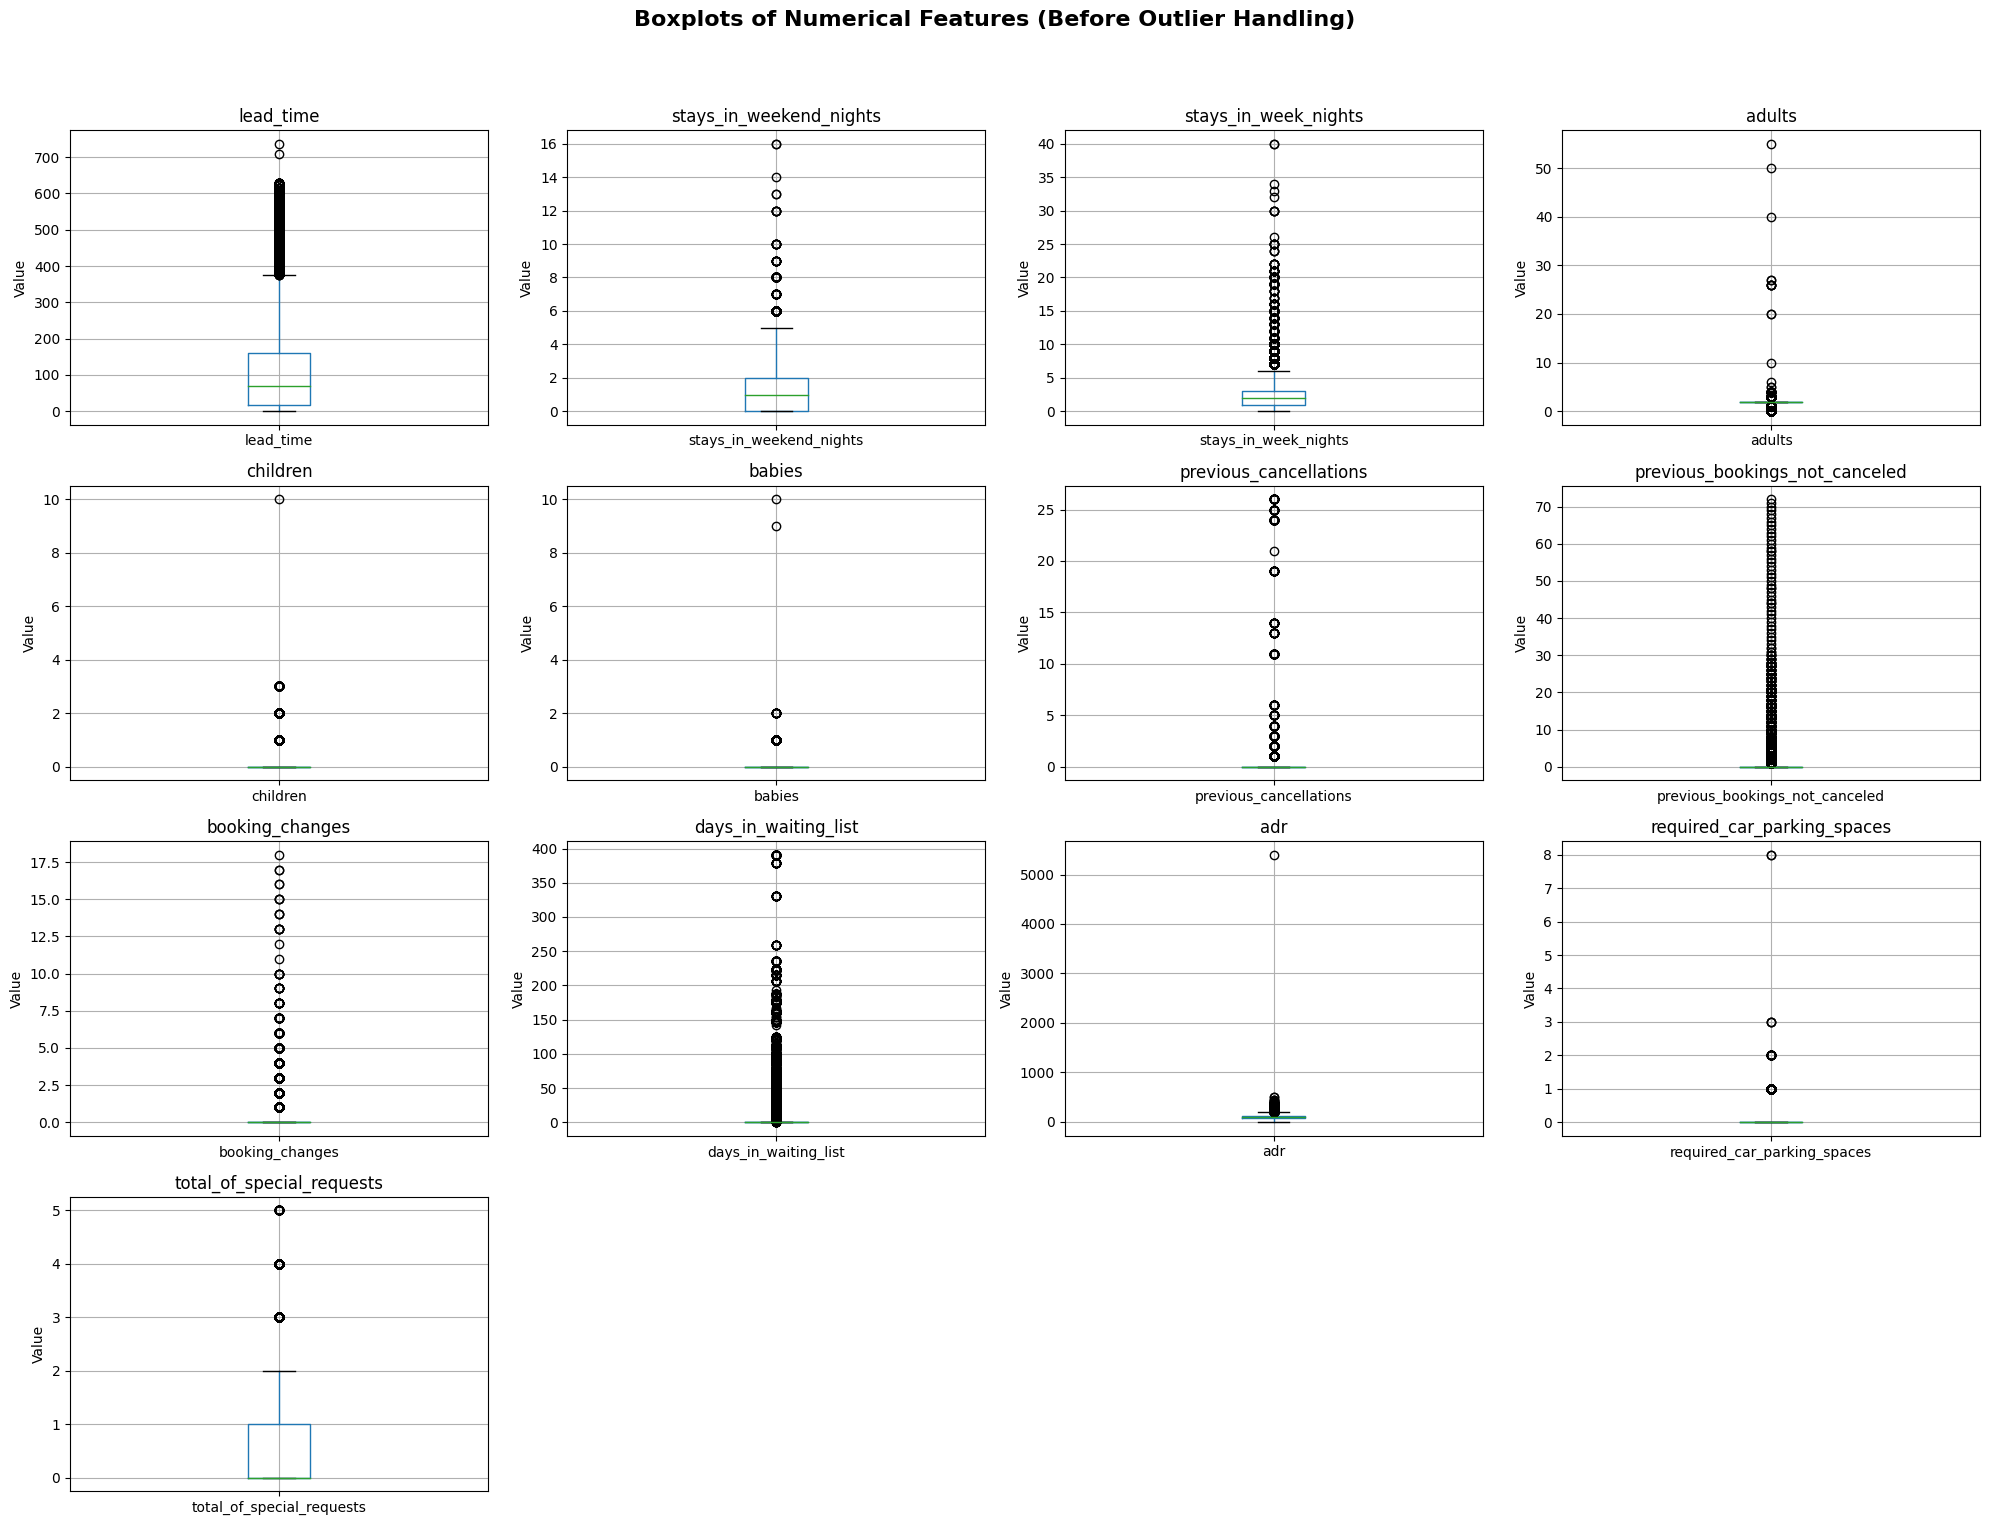

In [43]:
# Calculate layout parameters for the boxplots
n_features = len(num_features)
n_cols = 4  # Number of columns for display
n_rows = np.ceil(n_features / n_cols).astype(int)  # Number of rows needed

# Create a figure for the boxplots
plt.figure(figsize=(20, n_rows * 4))
plt.suptitle("Boxplots of Numerical Features (Before Outlier Handling)", fontsize=16, fontweight='bold')

# Generate boxplots for each numerical feature
for i, feature in enumerate(num_features, 1):
    plt.subplot(n_rows, n_cols, i) 
    df3.boxplot(column=feature, vert=True) 
    plt.title(feature, fontsize=12)  
    plt.ylabel('Value') 

# Adjust layout and display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [44]:
df4 = df3.copy()

In [45]:
# Capping outliers
df4.loc[df4['required_car_parking_spaces'] > 5, 'required_car_parking_spaces'] = 5
df4 = df4.drop(df4['adr'].idxmax())

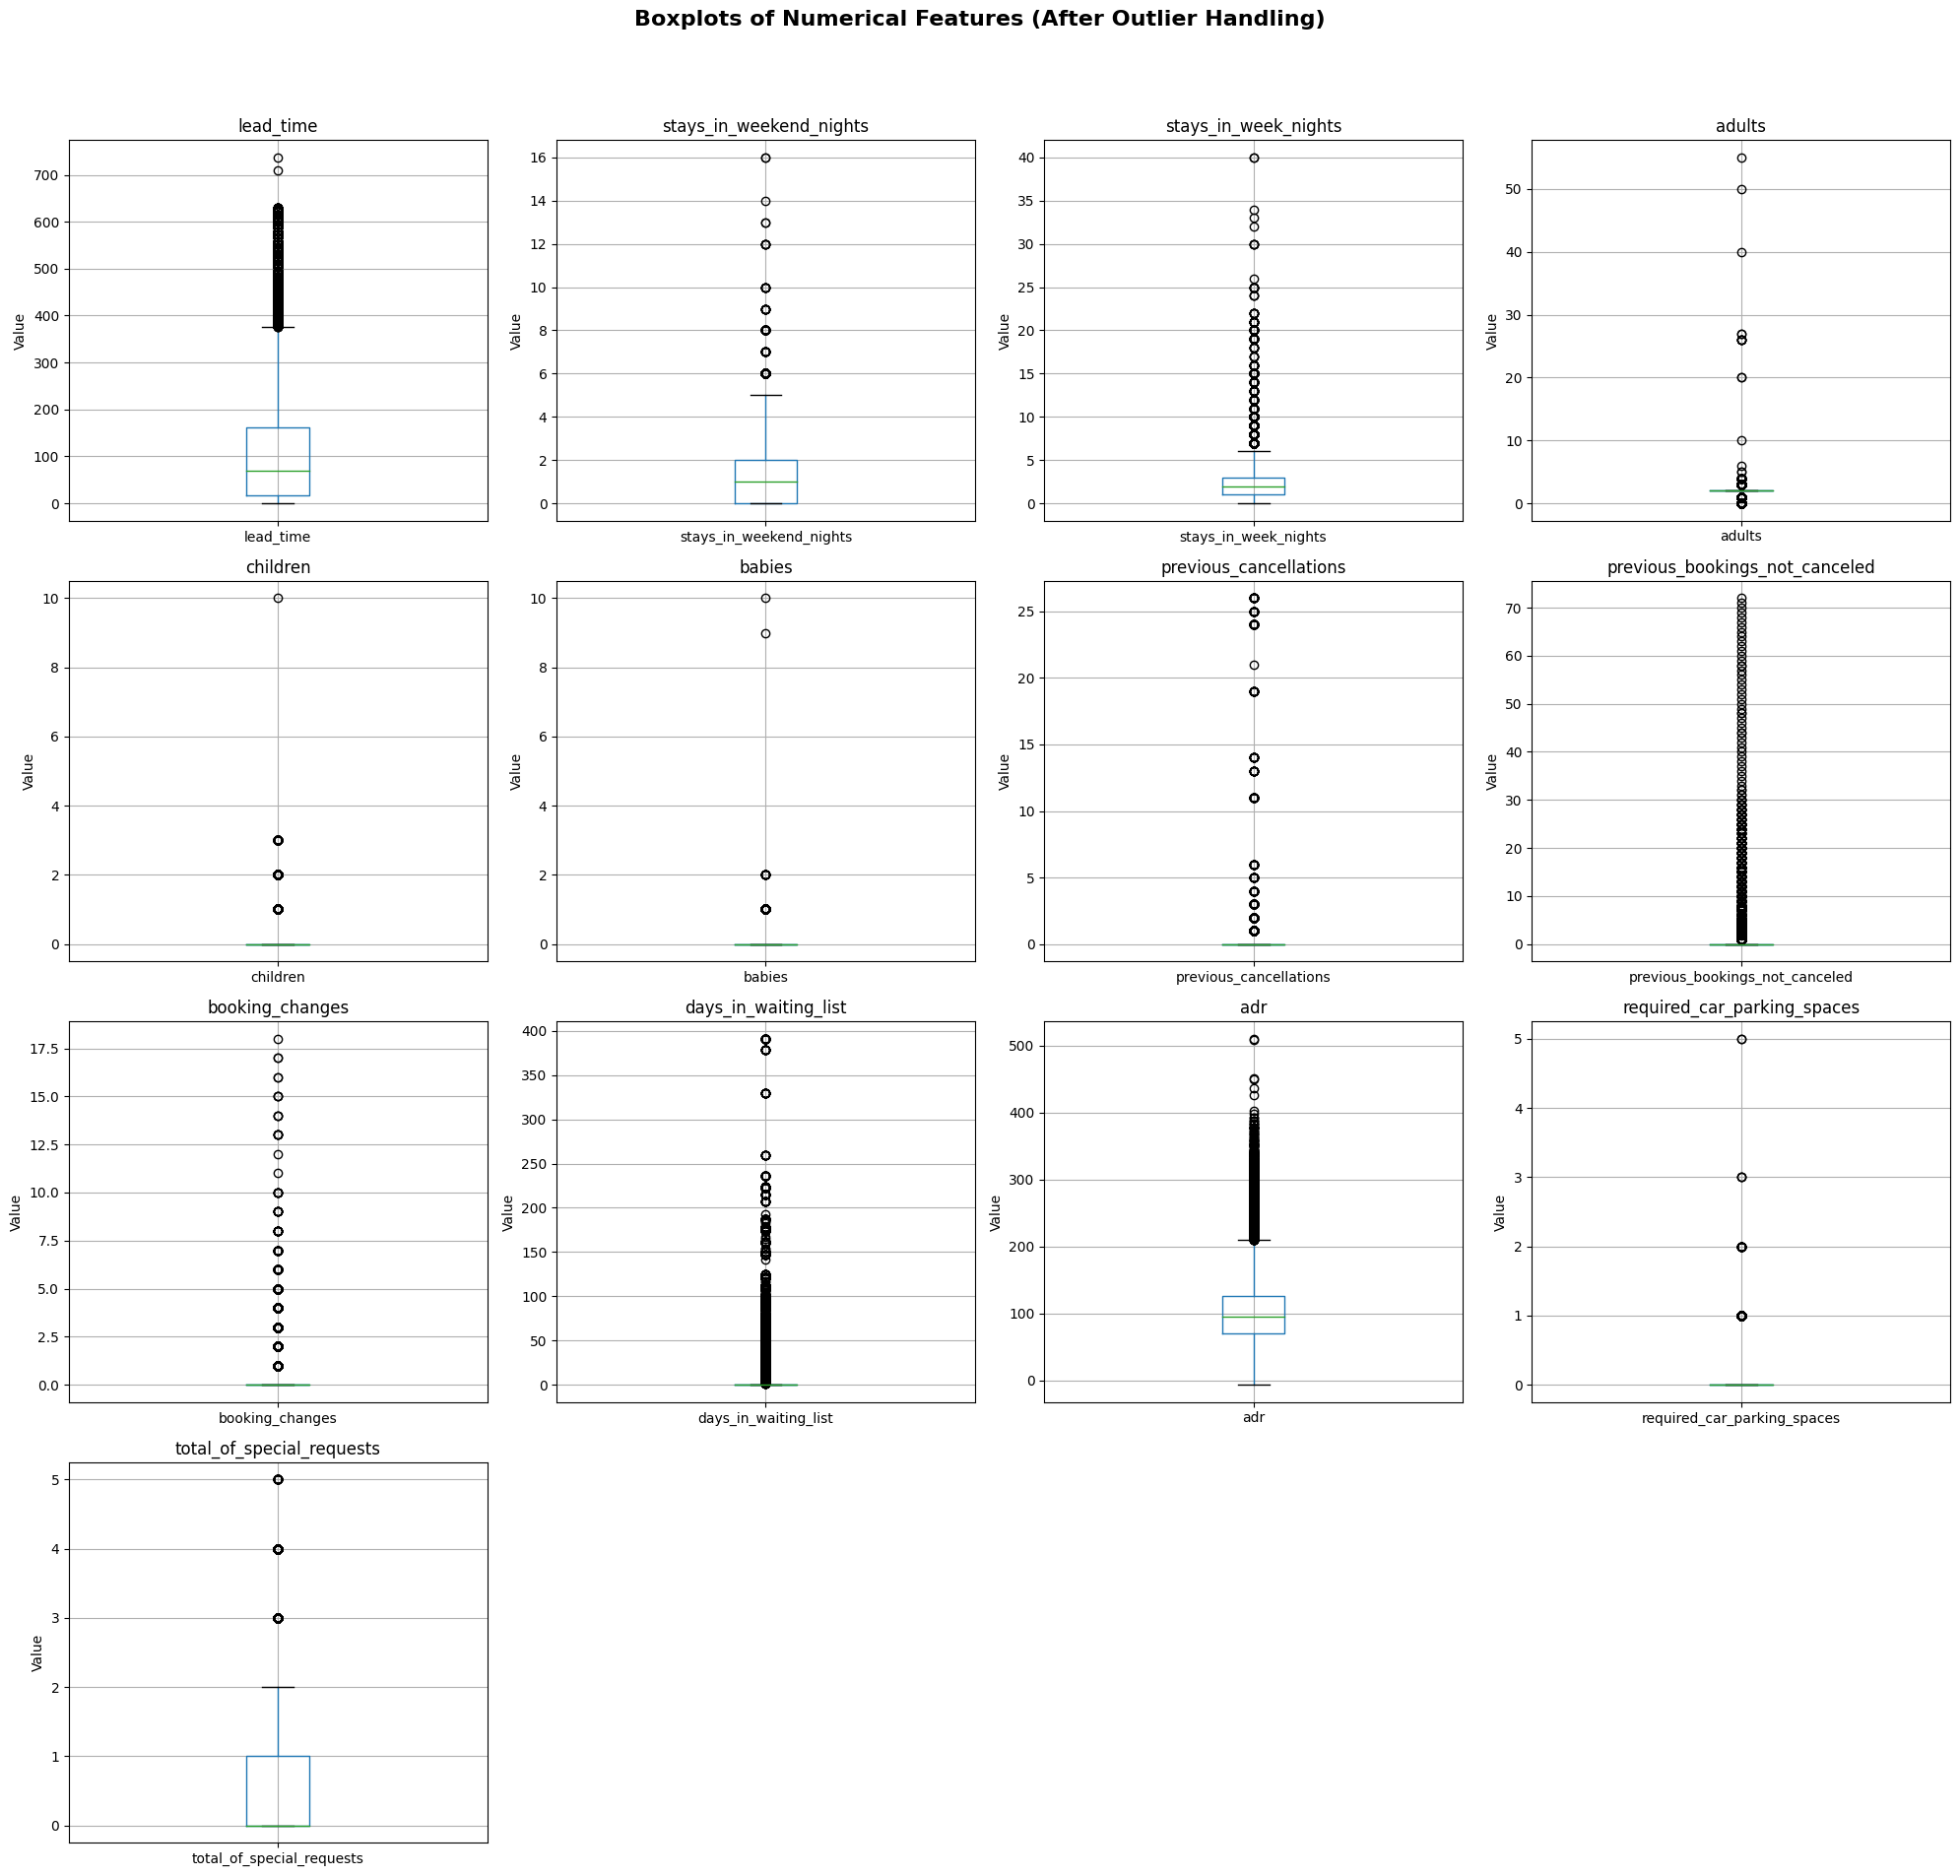

In [46]:
# Create a figure for the boxplots
plt.figure(figsize=(20, n_rows * 5))
plt.suptitle("Boxplots of Numerical Features (After Outlier Handling)", fontsize=16, fontweight='bold')

# Generate boxplots for each numerical feature
for i, feature in enumerate(num_features, 1):
    plt.subplot(n_rows, n_cols, i) 
    df4.boxplot(column=feature, vert=True)
    plt.title(feature, fontsize=12) 
    plt.ylabel('Value') 

# Adjust layout and display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Remove duplicate data

In [47]:
# Count total duplicates
df4.duplicated().sum()

np.int64(31966)

In [48]:
# Drop duplicates rows
data = df4.drop_duplicates()

In [49]:
# Verification
data.duplicated().sum()

np.int64(0)

In [50]:
data.shape

(86761, 32)

# Save the cleaned data

In [ ]:
data.to_csv('../../data/data_clean.csv', index=False)